<a href="https://colab.research.google.com/github/mahluwal/Tensorflow/blob/master/multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About this Notebook**

In this notebook, we learn how to use scikit-learn to implement Multiple linear regression. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, Evaluate your model using test set, and finally use model to predict unknown value

**Importing packages**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

**Understanding the Data**

We have downloaded a fuel consumption dataset, FuelConsumption.csv, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. 

**MODELYEAR** e.g. 2014

**MAKE** e.g. Acura

**MODEL** e.g. ILX

**VEHICLE CLASS** e.g. SUV

**ENGINE SIZE** e.g. 4.7

**CYLINDERS** e.g 6

**TRANSMISSION** e.g. A6

**FUELTYPE** e.g. z

**FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9

**FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9

**FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2

**CO2 EMISSIONS (g/km)** e.g. 182 --> low --> 0

**Reading the Data**

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/mahluwal/Data1/main/Fuel%20Consumption.csv",  encoding='cp1252')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLE CLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION in CITY (L/100 km),FUEL CONSUMPTION in HWY (L/100 km),FUEL CONSUMPTION COMB (L/100 km),FUELCONSUMPTION_COMB,CO2EMISSIONS
0,NaN,NaN,# = high output engine,NaN,(L),NaN,NaN,TYPE,NaN,HWY (L/100 km),COMB (L/100 km),COMB (mpg),(g/km)
1,2014,ACURA,ILX,COMPACT,2,4.0,AS5,Z,9.9,6.7,8.5,33,196
2,2014,ACURA,ILX,COMPACT,2.4,4.0,M6,Z,11.2,7.7,9.6,29,221
3,2014,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,Z,6.0,5.8,5.9,48,136
4,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,Z,12.7,9.1,11.1,25,255


In [4]:
df.dropna(axis = 0, inplace = True)


In [5]:
df.reset_index(drop = True, inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   MODELYEAR                            1071 non-null   object 
 1   MAKE                                 1071 non-null   object 
 2   MODEL                                1071 non-null   object 
 3   VEHICLE CLASS                        1071 non-null   object 
 4   ENGINESIZE                           1071 non-null   object 
 5   CYLINDERS                            1071 non-null   float64
 6   TRANSMISSION                         1071 non-null   object 
 7   FUEL                                 1071 non-null   object 
 8   FUEL CONSUMPTION in CITY (L/100 km)  1071 non-null   float64
 9   FUEL CONSUMPTION in HWY (L/100 km)   1071 non-null   object 
 10  FUEL CONSUMPTION COMB (L/100 km)     1071 non-null   object 
 11  FUELCONSUMPTION_COMB          

In [7]:
df[['ENGINESIZE','CYLINDERS','FUEL CONSUMPTION in CITY (L/100 km)','FUEL CONSUMPTION in HWY (L/100 km)','FUELCONSUMPTION_COMB','CO2EMISSIONS']] = df[['ENGINESIZE','CYLINDERS','FUEL CONSUMPTION in CITY (L/100 km)','FUEL CONSUMPTION in HWY (L/100 km)','FUELCONSUMPTION_COMB','CO2EMISSIONS']].apply(pd.to_numeric)

Lets selecet features that we want to use for regression.

In [8]:
cdf = df[['ENGINESIZE','CYLINDERS','FUEL CONSUMPTION in CITY (L/100 km)','FUEL CONSUMPTION in HWY (L/100 km)','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUEL CONSUMPTION in CITY (L/100 km),FUEL CONSUMPTION in HWY (L/100 km),FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4.0,9.9,6.7,33,196
1,2.4,4.0,11.2,7.7,29,221
2,1.5,4.0,6.0,5.8,48,136
3,3.5,6.0,12.7,9.1,25,255
4,3.5,6.0,12.1,8.7,27,244


Lets plot Emision values with respect to Engine size:

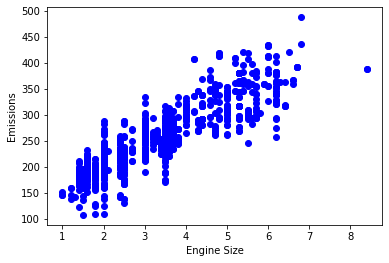

In [9]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.show()

**Creating train and test dataset**

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it’s truly an out-of-sample testing.

In [10]:
msk = np.random.rand(len(df)) < 0.8
msk

array([ True,  True,  True, ..., False,  True,  True])

In [11]:

train = cdf[msk]
test = cdf[~msk]

**Train Data distribution**

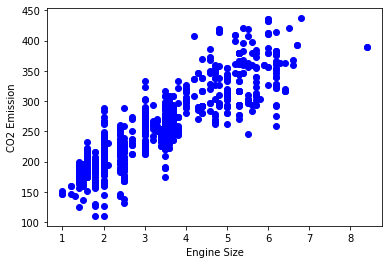

In [12]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emission')
plt.show()

**Multiple Regression Model**

In reality, there are multiple variables that predict the Co2emission. When more than one independent variable is present, the process is called multiple linear regression. For example, predicting co2emission using FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that Multiple linear regression is the extension of simple linear regression model.

In [13]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)

print('Coefficients: ', regr.coef_)
print("intercept: ", regr.intercept_)

Coefficients:  [[10.64692977  6.61375275 -4.9090285 ]]
intercept:  [312.54010488]


As mentioned before, Coefficient and Intercept , are the parameters of the fit line. Given that it is a multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

**Ordinary Least Squares (OLS)**

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output (y-hat) over all samples in the dataset.

OLS can find the best parameters using of these features:

- Solving the model parameters analytically using closed-form equations
- Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

**Prediction**

In [14]:
y_= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print('Residual sum squares: %.2f' % np.mean((y_ - y) **2 ))
print('Variance score: %.2f' % regr.score(x,y)) # Explained variance score: 1 is perfect prediction

Residual sum squares: 452.80
Variance score: 0.87


In [15]:
from sklearn.metrics import mean_squared_error

rms = np.sqrt(mean_squared_error(y, y_))

In [16]:
rms

21.27910888939123

In [17]:
21**2

441

**explained variance regression score:**

If $\hat{y}$ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  

The best possible score is 1.0, lower values are worse.

**Practice**

Try to use a multiple linear regression with the same dataset but this time use FUEL CONSUMPTION in CITY and FUEL CONSUMPTION in HWY instead of FUELCONSUMPTION_COMB. Does it result in better accuracy?

In [18]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUEL CONSUMPTION in CITY (L/100 km)','FUEL CONSUMPTION in HWY (L/100 km)']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)

y_= regr.predict(test[['ENGINESIZE','CYLINDERS','FUEL CONSUMPTION in CITY (L/100 km)','FUEL CONSUMPTION in HWY (L/100 km)']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUEL CONSUMPTION in CITY (L/100 km)','FUEL CONSUMPTION in HWY (L/100 km)']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[11.10423069  7.47221447  5.84864607  3.38995867]]
Residual sum of squares: 537.38
Variance score: 0.85
